<a href="https://colab.research.google.com/github/adasegroup/ML2024_seminars/blob/master/seminar14/seminar_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seminar: Clustering

#### Seminar structure:

* Clustering for IRIS data
* Scoring for cluster analysis
* Clustering methods


## 1. Cluster analysis, what for?

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target
print('Iris data shape:', X.shape)
print('Iris num classes:', max(y) + 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

print('KNN classification accuracy:', np.round(clf.score(X_test, y_test),3))
print('Nice and very accurate classification, and why do we need cluster analysis?')

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objs as go
import colorlover as cl

init_notebook_mode(connected=True)

def plot_3d (X, y, title = 'MNIST visualization PCA'):

    digits_3d = pd.DataFrame({
        'x': X[:, 0],
        'y': X[:, 1],
        'z': X[:, 2],
        'label': y,
    })

    colors = cl.scales['10']['qual']['Paired']
    data = []

    for i in range(10):
        x = digits_3d[digits_3d['label'].astype('int') == i]['x']
        y = digits_3d[digits_3d['label'].astype('int') == i]['y']
        z = digits_3d[digits_3d['label'].astype('int') == i]['z']

        color = colors[i]

        trace = {
            'name': str(i),
            'x': x,
            'y': y,
            'z': z,
            'type': 'scatter3d',
            'mode': 'markers',
            'marker': {
                'size': 5,
                'color': color
            }
        }
        data.append(trace)

    layout = go.Layout(
        title= title,
        width=900,
        height=600
    )

    fig = go.Figure(data=data, layout=layout)

    iplot(fig, show_link = False)

In [3]:
import plotly.io as pio
pio.renderers

In [ ]:
pio.renderers.default = "colab"

In [4]:
plot_3d(X, y, 'IRIS true labels')

#### But what if we have no targets at all?

In [5]:
plot_3d(X, np.zeros_like(y), 'IRIS no labels :(')

### 1.1. We do not know clustering algorithms, what we can do right now?

- apply dimensionality reduction methods;
- apply anomaly detection methods;
- estimate visually;

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # just because it of 3D visualisation

iris = load_iris()
X = iris.data
y = iris.target

pca.fit(X)
X = pca.transform(X)
plot_3d(X, np.zeros_like(y), 'PCA() IRIS no labels')

### 1.2. Scoring methods in cluster analysis:

We create dummy (baseline) clustering following "visual" analysis.

In [7]:
dummy_labels = np.zeros_like(y)

dummy_labels[X[:,0] > -2] = 1 # defining two classes

# let' have look how it worked out
plot_3d(X, dummy_labels, 'PCA() IRIS, dummy labels')

#### 1.2.1. Homogeneity, completeness, and V-measure

Homogeneity, completeness, and V-measure are three key related indicators of the quality of a clustering operation.

**Homogenity:** scores that each cluster has data-points belonging to the same class label. Homogeneity describes the closeness of the clustering algorithm to this perfection.

For $N$ data samples, C different class labels, $K$ clusters and $a_{ck}$ number of data-points belonging to the class c and cluster k. Then the homogeneity $h$ is given by the following:
$$h = 1- \frac{H(C,K)}{H(C)}$$,

where
$$H(C,K) = - \sum_{k=1}^{K}\sum_{c=1}^{C} \frac{a_{ck}}{N} log(\frac{a_{ck}}{\sum_{c=1}^{C}a_{ck}})$$
and

$$H(C) = -\sum_{c=1}^{C} \frac{\sum_{k=1}^{K} a_{ck}}{C} log(\frac{\sum_{k=1}^{K} a_{ck}}{C})$$

**Completeness:** scores if all data-points belonging to the same class are clustered into the same cluster. Completeness describes the closeness of the clustering algorithm to this perfection.

$$ c = 1 - \frac{H(K,C)}{H(K)}$$

**V-Measure**:

`v = (1 + beta) * homogeneity * completeness / (beta * homogeneity + completeness)`


Credit for: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html

#### 1.2.2. Silhouette coefficient

The silhouette coefficient contrasts the average distance to elements in the same cluster with the average distance to elements in other clusters. Objects with a high silhouette value are considered well clustered, objects with a low value may be outliers. This index works well with k-means clustering, and is also used to determine the optimal number of clusters.

Assume the data have been clustered via any technique, such as `k-means`, into $k$ clusters.

For data point $i \in C_i$ (data point $i$ in the cluster $C_i$), let

$$ a(i) = \frac{1}{|C_i| - 1} \sum_{j \in C_i, i \neq j} d(i, j) $$

be the mean distance between $i$ and all other data points in the same cluster, where $d(i, j)$ is the distance between data points $i$ and $j$ in the cluster $C_i$ (we divide by $|C_i| - 1$ because we do not include the distance $d(i, i)$ in the sum). We can interpret $a(i)$ as a measure of how well $i$ is assigned to its cluster (the smaller the value, the better the assignment).

#### 1.2.3. Rand index adjusted for chance.

The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).

#### 1.2.4. Mutual Information between two clusterings.
Mutual Information between two clusterings.

The Mutual Information is a measure of the similarity between two labels of the same data. Where
 is the number of the samples in cluster
 and
 is the number of the samples in cluster
, the Mutual Information between clusterings  and  is given as:

$$MI(U,V)=\sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \frac{|U_i\cap V_j|}{N}
\log\frac{N|U_i \cap V_j|}{|U_i||V_j|}$$


This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Credit for: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html#sklearn.metrics.mutual_info_score

In [8]:
from sklearn import metrics

def cluster_scoring(X, y, predicted_y):
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, predicted_y))
    print("Completeness: %0.3f" % metrics.completeness_score(y, predicted_y))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, predicted_y))
    print("Silhouette Score: %.3f" % metrics.silhouette_score(X, predicted_y))
    print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y, predicted_y))
    print("Mutual Information: %.3f" % metrics.mutual_info_score(y, predicted_y))

cluster_scoring(X, y, dummy_labels)

#### And let's define the pivot table:

In [9]:
iris_cluster = pd.DataFrame()

def cluster_scoring_pivot(X, y, predicted_y, iris_cluster, alg):
    cluster_scoring(X, y, predicted_y)
    iris_cluster = iris_cluster.append({'algorithm':alg,
                        'hom': metrics.homogeneity_score(y, predicted_y),
                        'comp': metrics.completeness_score(y, predicted_y),
                        'v-measure': metrics.v_measure_score(y, predicted_y),
                        'silhouette': metrics.silhouette_score(X, predicted_y),
                        'rand. index': metrics.adjusted_rand_score(y, predicted_y),
                        'mutual info': metrics.mutual_info_score(y, predicted_y)}, ignore_index =True)
    return iris_cluster

iris_cluster = cluster_scoring_pivot(X, y, dummy_labels, iris_cluster, 'dummy')

## 2. Clustering types:

#### __Clustering__ - is unsupervised learning methods for grouping samples.

#### types:

    1.1. Centroid-based Clustering
    1.2. Density-based Clustering
    1.3. Hierarchical Clustering
    1.4. Distribution-based Clustering

## 2.1. Centroid-based Clustering: `KMeans`

Organizes the data into non-hierarchical clusters, in contrast to hierarchical clustering defined below. k-means is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. This course focuses on k-means because it is an efficient, effective, and simple clustering algorithm.

Credit for: https://developers.google.com/machine-learning/clustering/clustering-algorithms

![kmeans](https://ds055uzetaobb.cloudfront.net/brioche/uploads/y4KGN92h7r-screen-shot-2016-05-05-at-43007-pm.png?width=1200)

In [10]:
from sklearn.cluster import KMeans, MiniBatchKMeans # what is the difference between these two?

X = iris.data
y = iris.target

km = KMeans(2)
km.fit(X)

plot_3d(X, km.labels_, 'KMeans, n_components = 2')
iris_cluster = cluster_scoring_pivot(X, y, km.labels_, iris_cluster, 'KMeans, 2')

What if we do not know the `n_components`?

In [11]:
from sklearn.cluster import KMeans, MiniBatchKMeans # what is the difference between these two?

X = iris.data
y = iris.target

km = KMeans(3)
km.fit(X)

plot_3d(X, km.labels_, 'KMeans, n_components = 3')
iris_cluster = cluster_scoring_pivot(X, y, km.labels_, iris_cluster, 'KMeans, 3')

## 2.2. Density-based Clustering: `DBSCAN`

Density-based clustering connects areas of high example density into clusters. This allows for arbitrary-shaped distributions as long as dense areas can be connected. These algorithms have difficulty with data of varying densities and high dimensions. Further, by design, these algorithms do not assign outliers to clusters.

![dbscan](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/600px-DBSCAN-Illustration.svg.png)

In [ ]:
# DBSCAN?

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder

X = iris.data
y = iris.target

db = DBSCAN()# how many components we define here?
db.fit(X)

y_pred = LabelEncoder().fit_transform(db.labels_)

plot_3d(X, y_pred, 'DBSCAN')
iris_cluster = cluster_scoring_pivot(X, y, y_pred, iris_cluster, 'DBSCAN')

## 2.3. Distribution-based Clustering: `GaussianMixture()`

This clustering approach assumes data is composed of distributions, such as Gaussian distributions. In the figure below the distribution-based algorithm clusters data into three Gaussian distributions. As distance from the distribution's center increases, the probability that a point belongs to the distribution decreases. The bands show that decrease in probability. When you do not know the type of distribution in your data, you should use a different algorithm.

Credit for: https://developers.google.com/machine-learning/clustering/clustering-algorithms

<center>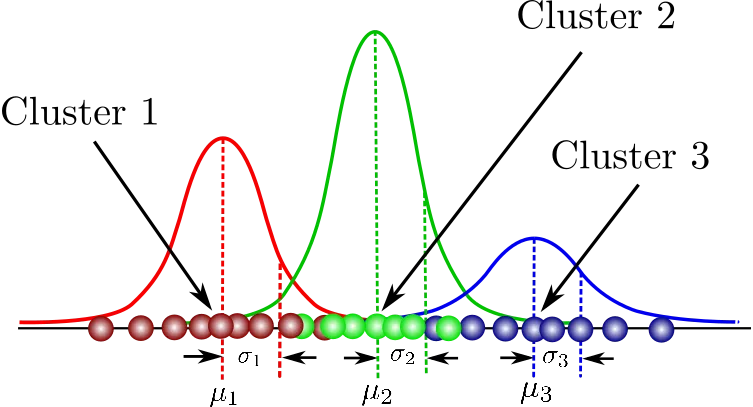

How to fit Gaussian Mixture on the data?

- for practical explanation of EM-algorithm/alternatives, check [github](https://github.com/r-isachenko/2022-2023-DGM-MIPT-course): [lecture](https://github.com/r-isachenko/2022-2023-DGM-MIPT-course/blob/main/lectures/lecture3/Lecture3.pdf) and [seminar](https://github.com/r-isachenko/2022-2023-DGM-MIPT-course/blob/main/seminars/seminar3/seminar3.ipynb)

In [13]:
from sklearn.mixture import GaussianMixture

X = iris.data
y = iris.target

gm = GaussianMixture(n_components = 3) # what if will not define the num. pf components?
gm.fit(X)

y_pred = gm.predict(X)

plot_3d(X, y_pred, 'GaussianMixture, n_components = 3 ')
iris_cluster = cluster_scoring_pivot(X, y, y_pred, iris_cluster, 'GaussianMixture')

## 2.4. Hierarchical Clustering: `AgglomerativeClustering()`

Hierarchical clustering creates a tree of clusters.

<center>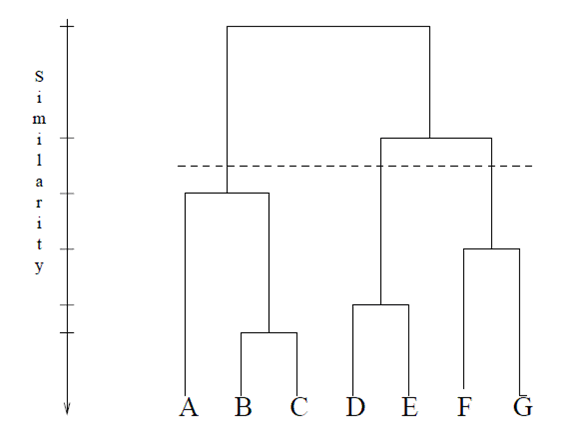

<!-- ![hierarchical](https://github.com/adasegroup/ML2023_seminars/blob/master/seminar16/Agglomerative_clustering_dendogram.png?raw=1) -->

In [ ]:
# AgglomerativeClustering?

In [14]:
from sklearn.cluster import AgglomerativeClustering

X = iris.data
y = iris.target

ac = AgglomerativeClustering(n_clusters = 3) # what if will define the num. pf components?
ac.fit(X)

y_pred = LabelEncoder().fit_transform(ac.labels_)

plot_3d(X, y_pred, 'AgglomerativeClustering, n_clusters = 3 ')
iris_cluster = cluster_scoring_pivot(X, y, y_pred, iris_cluster, 'AgglomerativeClustering')

#### voilla, let's check the pivot:

In [15]:
iris_cluster.style.background_gradient(axis=1, cmap='PuBu', low=0, high = 1)